# Perceptron learning

Go Pytorch !

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import ipywidgets as widgets

np.random.seed(0)

In [2]:
xmin = 0.01
xmax = 1
xres = 100

x = np.linspace(xmin, xmax, xres)
y = np.polynomial.polynomial.polyval(x, [0, 2, 5]) + np.sin(10*x) + 0.2 * np.random.normal(size=xres)

x_torch = torch.tensor(x, dtype=torch.float).view(-1, 1)
y_torch = torch.tensor(y, dtype=torch.float).view(-1, 1)

In [3]:
class Net(nn.Module):
    def __init__(self, w1):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, w1)
        self.fc2 = nn.Linear(w1, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def get_weights(self):
        return model.fc1.weight.view(-1).detach().numpy()

In [4]:
epochs = 25000
learning_rate = 1e-4
w1_dim = 256

n_saves = 100
y_predicted_saves = np.zeros((n_saves, xres))
w_computed_saves = np.zeros((n_saves, w1_dim))
loss_computed_saves = np.zeros(n_saves)

model = Net(w1_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
                
for epoch in range(epochs):
    print_range = round(epochs / n_saves)
    save_step = round(epoch / print_range)
    
    # zero the parameter gradients from previous epoch
    optimizer.zero_grad()
    
    # forward + backward + optimize
    output = model(x_torch)
    loss = criterion(output, y_torch)
    loss.backward()    # accumulate gradients through backprop
    optimizer.step()   # Does the update
    
    # save state of model and predictions
    if(epoch % print_range == 0):
        print('epoch {}, loss {}'.format(epoch, loss.data.item()))
        y_predicted_saves[save_step] = model(x_torch).view(-1).detach().numpy()
        w_computed_saves[save_step] = model.get_weights()
        loss_computed_saves[save_step] = loss.data.item()
    
#list(model.parameters())

epoch 0, loss 15.571160316467285
epoch 250, loss 6.7173991203308105
epoch 500, loss 3.5491113662719727
epoch 750, loss 2.376688241958618
epoch 1000, loss 1.6703557968139648
epoch 1250, loss 1.1721171140670776
epoch 1500, loss 0.8836653232574463
epoch 1750, loss 0.7312383651733398
epoch 2000, loss 0.6505233645439148
epoch 2250, loss 0.6032549142837524
epoch 2500, loss 0.5676851868629456
epoch 2750, loss 0.5341242551803589
epoch 3000, loss 0.5013303160667419
epoch 3250, loss 0.46878379583358765
epoch 3500, loss 0.4381682872772217
epoch 3750, loss 0.40912535786628723
epoch 4000, loss 0.3809782564640045
epoch 4250, loss 0.35381782054901123
epoch 4500, loss 0.3275827169418335
epoch 4750, loss 0.30214646458625793
epoch 5000, loss 0.2778181731700897
epoch 5250, loss 0.25503841042518616
epoch 5500, loss 0.23527538776397705
epoch 5750, loss 0.21866144239902496
epoch 6000, loss 0.20478855073451996
epoch 6250, loss 0.19341976940631866
epoch 6500, loss 0.18401725590229034
epoch 6750, loss 0.176316

## Plots

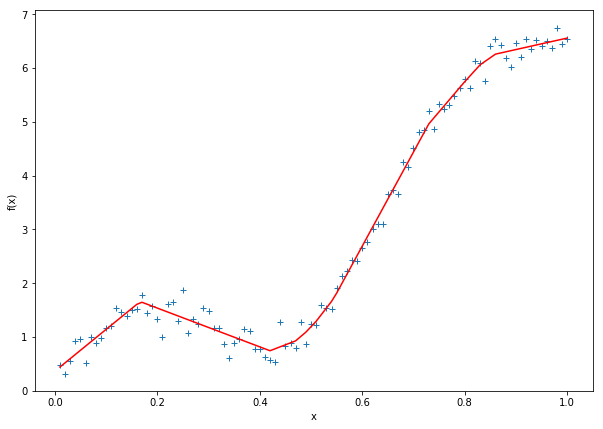

In [5]:
fig = plt.figure(figsize=(10,7))
plt.plot(x, y, '+', x, model(x_torch).view(-1).detach().numpy(), 'r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

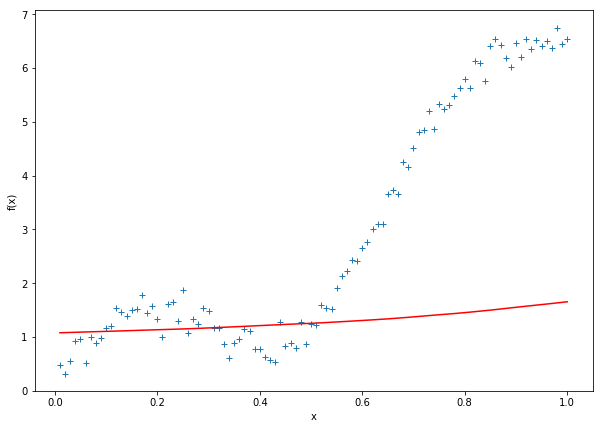

In [6]:
fig = plt.figure(figsize=(10,7))
plt.plot(x, y, '+', x, y_predicted_saves[1], 'r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

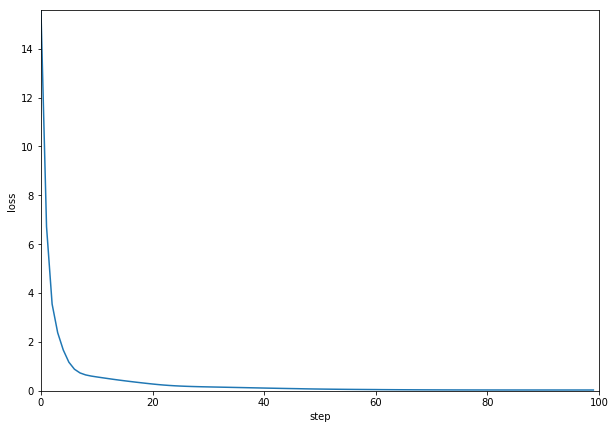

In [7]:
fig = plt.figure(figsize=(10,7))
plt.plot(np.arange(0, n_saves), loss_computed_saves)
plt.xlabel('step')
plt.ylabel('loss')
plt.xlim((0, n_saves))
plt.ylim((0, np.max(loss_computed_saves)))
plt.show()

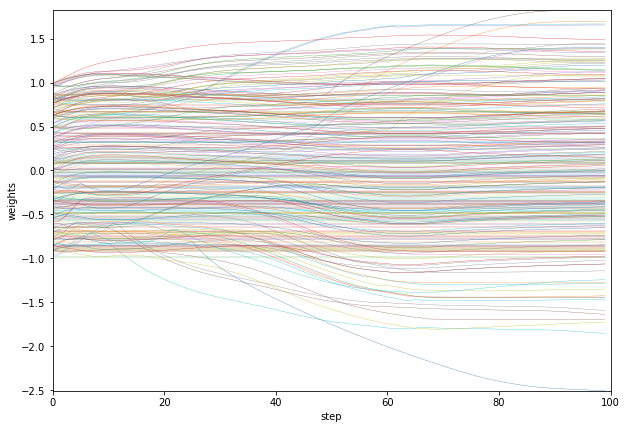

In [8]:
fig = plt.figure(figsize=(10,7))
plt.plot(np.arange(0, n_saves), w_computed_saves, linewidth=.3)
plt.xlabel('step')
plt.ylabel('weights')
plt.xlim((0, n_saves))
plt.ylim((np.min(w_computed_saves), np.max(w_computed_saves)))
plt.show()

## Play widget

In [9]:
ymin, ymax = np.min(y_predicted_saves), np.max(y_predicted_saves)
 
plot_output = widgets.Output()

rmse_output = widgets.HTML()
rmse_progress = widgets.FloatProgress(
    min=0,
    max=1.0,
    step=0.01,
    description='Cost :',
    bar_style='info',
    orientation='horizontal'
)
rmse_ui = widgets.HBox([rmse_progress, rmse_output], layout={'margin':'10px 10px 10px 10px'})

play_button = widgets.Play(
    value=0,
    min=0,
    max=n_saves - 1,
    step=1,
    description="Press play",
    disabled=False
)

play_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=n_saves - 1)

widgets.jslink((play_button, 'value'), (play_slider, 'value'))

play_ui = widgets.HBox([play_button, play_slider], layout={'margin':'10px 10px 10px 10px'})
ui = widgets.VBox([plot_output, rmse_ui, play_ui], layout={'border':'1px solid black'})

def update_plot(ev):
    plot_output.clear_output(wait=True)
    with plot_output:
        fig = plt.figure(figsize=(10,7))
        plt.plot(x, y, '+', x, y_predicted_saves[play_slider.value], 'r')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.ylim((ymin, ymax))
        plt.show()
        
        rmse_output.value = str(loss_computed_saves[play_slider.value])
        rmse_progress.value = loss_computed_saves[play_slider.value]

play_slider.observe(update_plot, names='value')
update_plot(None) # initialize widget

display(ui)